# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base url and use units as metric
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

# Set lists to append data for DataFrame
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
existing_city = []

count = 0
set_processing = 1

# Loop through list of cities and print log
for city in cities:
    response = requests.get(query_url + city).json()
    
    # adding excepting handling
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # setting the set limit
        if count > 50:
            count = 1
            set_processing += 1
            existing_city.append(city)
        else:
            count += 1
            existing_city.append(city)
        print(f"Processing Record {count} of Set {set_processing} for {city}")
    except (KeyError, IndexError):
        print("City not found, skipping...")

print("----Data Retrieval Complete----")


City not found, skipping...
City not found, skipping...
Processing Record 1 of Set 1 for east london
Processing Record 2 of Set 1 for atuona
Processing Record 3 of Set 1 for lagoa
Processing Record 4 of Set 1 for whitefish
Processing Record 5 of Set 1 for kodiak
City not found, skipping...
Processing Record 6 of Set 1 for hovd
Processing Record 7 of Set 1 for busselton
Processing Record 8 of Set 1 for puerto ayora
Processing Record 9 of Set 1 for kharp
Processing Record 10 of Set 1 for lagunas
Processing Record 11 of Set 1 for atambua
Processing Record 12 of Set 1 for talaya
Processing Record 13 of Set 1 for fare
Processing Record 14 of Set 1 for kalmunai
Processing Record 15 of Set 1 for tual
Processing Record 16 of Set 1 for hermanus
Processing Record 17 of Set 1 for nikolskoye
Processing Record 18 of Set 1 for northam
Processing Record 19 of Set 1 for kapaa
Processing Record 20 of Set 1 for mataura
City not found, skipping...
Processing Record 21 of Set 1 for tasiilaq
Processing Rec

Processing Record 30 of Set 4 for bambous virieux
Processing Record 31 of Set 4 for uruzgan
Processing Record 32 of Set 4 for chumikan
Processing Record 33 of Set 4 for deputatskiy
Processing Record 34 of Set 4 for marsa matruh
Processing Record 35 of Set 4 for geraldton
Processing Record 36 of Set 4 for at-bashi
Processing Record 37 of Set 4 for ayodhya
Processing Record 38 of Set 4 for chebsara
Processing Record 39 of Set 4 for alofi
Processing Record 40 of Set 4 for lafiagi
Processing Record 41 of Set 4 for leningradskiy
Processing Record 42 of Set 4 for lompoc
Processing Record 43 of Set 4 for abu dhabi
Processing Record 44 of Set 4 for raudeberg
Processing Record 45 of Set 4 for pathein
City not found, skipping...
City not found, skipping...
City not found, skipping...
Processing Record 46 of Set 4 for lebu
Processing Record 47 of Set 4 for kibala
Processing Record 48 of Set 4 for novoagansk
Processing Record 49 of Set 4 for terre-de-bas
Processing Record 50 of Set 4 for castro
Pr

Processing Record 6 of Set 8 for bestobe
Processing Record 7 of Set 8 for dromolaxia
Processing Record 8 of Set 8 for ustrzyki dolne
Processing Record 9 of Set 8 for lisakovsk
Processing Record 10 of Set 8 for lata
Processing Record 11 of Set 8 for madawaska
City not found, skipping...
Processing Record 12 of Set 8 for leshukonskoye
Processing Record 13 of Set 8 for salym
Processing Record 14 of Set 8 for taicheng
Processing Record 15 of Set 8 for mitu
Processing Record 16 of Set 8 for richards bay
City not found, skipping...
Processing Record 17 of Set 8 for isangel
City not found, skipping...
Processing Record 18 of Set 8 for tilichiki
Processing Record 19 of Set 8 for pisco
Processing Record 20 of Set 8 for kabul
Processing Record 21 of Set 8 for toktogul
Processing Record 22 of Set 8 for saryg-sep
Processing Record 23 of Set 8 for vendychany
Processing Record 24 of Set 8 for mamakan
Processing Record 25 of Set 8 for prokhorovka
Processing Record 26 of Set 8 for bonfim
Processing Re

City not found, skipping...
Processing Record 32 of Set 11 for sinnamary
Processing Record 33 of Set 11 for trairi
Processing Record 34 of Set 11 for kambove
Processing Record 35 of Set 11 for garowe
Processing Record 36 of Set 11 for ploemeur
Processing Record 37 of Set 11 for cockburn town
Processing Record 38 of Set 11 for carrefour
City not found, skipping...
Processing Record 39 of Set 11 for uglegorsk
Processing Record 40 of Set 11 for kurkino
Processing Record 41 of Set 11 for uncia
Processing Record 42 of Set 11 for nola
Processing Record 43 of Set 11 for abancay
Processing Record 44 of Set 11 for irbeyskoye
Processing Record 45 of Set 11 for portland
Processing Record 46 of Set 11 for mwene-ditu
Processing Record 47 of Set 11 for karatau
Processing Record 48 of Set 11 for sorland
Processing Record 49 of Set 11 for kasongo-lunda
Processing Record 50 of Set 11 for akhalgori
Processing Record 51 of Set 11 for marsabit
Processing Record 1 of Set 12 for najran
Processing Record 2 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a DataFrame from the raw data and export to csv
weather_df = pd.DataFrame({"City":existing_city,"Lat":lat,"Lng":lng,"Max temp":max_temp,"Humidity":humidity,\
                           "Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date})
weather_df["Date"] = pd.to_datetime(weather_df["Date"],unit='s').dt.strftime("%Y-%m-%d")
weather_df.to_csv("output_data/Weatherpy.csv")
weather_df.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,62.60,88,40,4.61,ZA,2021-02-01
1,atuona,-9.8000,-139.0333,78.24,77,1,17.94,PF,2021-02-01
2,lagoa,39.0500,-27.9833,59.56,78,98,25.64,PT,2021-02-01
3,whitefish,48.4111,-114.3376,37.99,70,1,2.13,US,2021-02-01
4,kodiak,57.7900,-152.4072,28.40,64,1,8.05,US,2021-02-01


In [36]:
# Checking that all cities are unique
# weather_df["City"].nunique()

# Summary statistics on DataFrame
weather_df.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,20.906533,17.004469,50.951399,72.996503,53.660839,8.654615
std,32.603032,88.212057,31.505512,19.653478,41.523994,6.248203
min,-54.800000,-179.166700,-50.150000,1.000000,0.000000,0.310000
25%,-5.116625,-59.583350,30.200000,63.750000,1.000000,3.817500
50%,26.210250,20.485350,60.080000,78.000000,74.500000,7.335000
75%,48.001400,92.206700,76.932500,87.000000,97.000000,11.522500
max,78.218600,179.316700,95.700000,100.000000,100.000000,37.980000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Find cities that have greater than 100%
high_humidity = weather_df.loc[weather_df["Humidity"] > 100]
high_humidity.count()

City          0
Lat           0
Lng           0
Max temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

## No cities have greater than 100% humidity in this selection

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

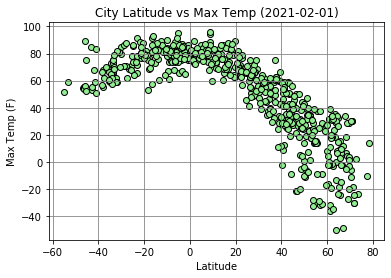

In [10]:
# Create a scattor plot of latitude vs temperature
x = weather_df["Lat"]
y = weather_df["Max temp"]
plt.scatter(x,y,edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs Max Temp (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_MaxTemp_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the Max Temp (F) for that city. At the lower latitude points of -60 there is a higher max temperature with the temperature decreasing as the Latitude reaches +80.

## Latitude vs. Humidity Plot

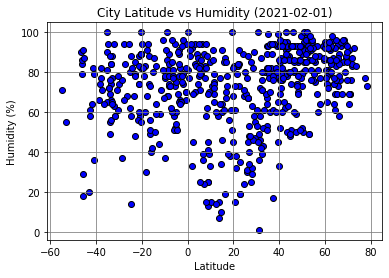

In [11]:
x = weather_df["Lat"]
y = weather_df["Humidity"]
plt.scatter(x,y,edgecolors="black",facecolors="blue")
plt.title("City Latitude vs Humidity (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_Humidity_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the Humidity % for that city. Looking at the graph there is not a strong correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

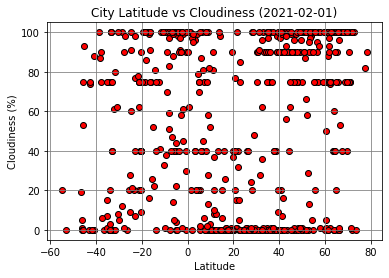

In [12]:
x = weather_df["Lat"]
y = weather_df["Cloudiness"]
plt.scatter(x,y,edgecolors="black",facecolors="red")
plt.title("City Latitude vs Cloudiness (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_Cloudiness_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the cloudiness for that city. Looking at the graph there is not a strong correlation between latitude and cloudiness, however there appear to be either a lot of no clouds or 100% cloud cover for the cities on this date.

## Latitude vs. Wind Speed Plot

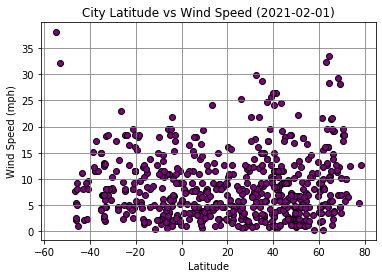

In [13]:
x = weather_df["Lat"]
y = weather_df["Wind Speed"]
plt.scatter(x,y,edgecolors="black",facecolors="purple")
plt.title("City Latitude vs Wind Speed (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_WindSpeed_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the wind speed for that city. Looking at the graph there is not a strong correlation between latitude and wind speend, however the lower latitude around -60 had a very windy day with over 35 mph wind. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.86


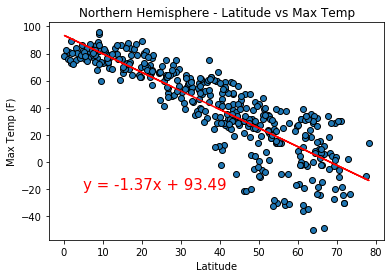

In [14]:
# Calculate the r value
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere["Max temp"]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {abs(round(correlation[0],2))}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/NorthernHemisphere_MaxTemp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.58


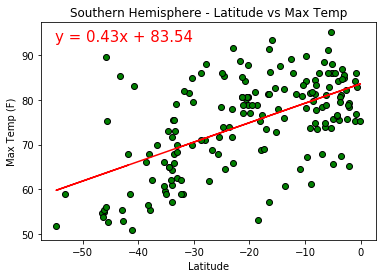

In [16]:
# Calculate the r value
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere["Max temp"]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {abs(round(correlation[0],2))}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-55,93),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/SouthernHemisphere_MaxTemp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.38


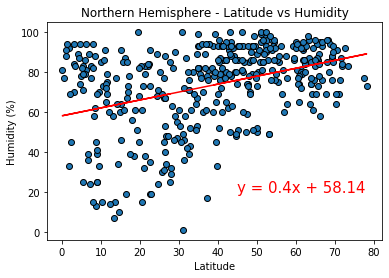

In [17]:
# Calculate the r value
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere["Humidity"]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {abs(round(correlation[0],2))}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/NorthernHemisphere_Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12


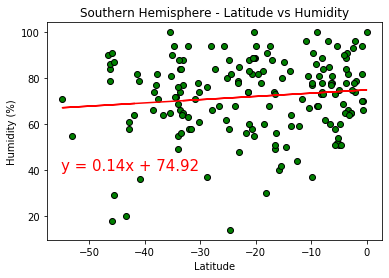

In [19]:
# Calculate the r value
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere["Humidity"]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {abs(round(correlation[0],2))}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/SouthernHemisphere_Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.32


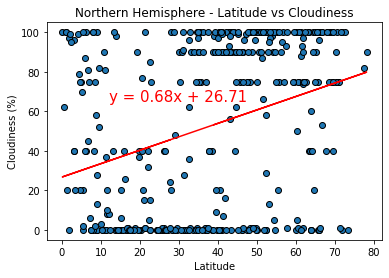

In [21]:
# Calculate the r value
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere["Cloudiness"]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {abs(round(correlation[0],2))}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(12,65),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/NorthernHemisphere_Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.34


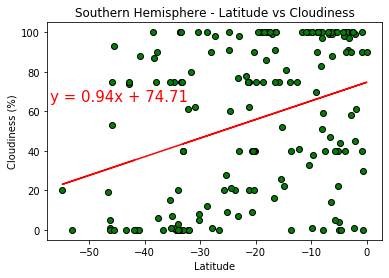

In [23]:
# Calculate the r value
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere["Cloudiness"]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {abs(round(correlation[0],2))}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-57,65),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/SouthernHemisphere_Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.16


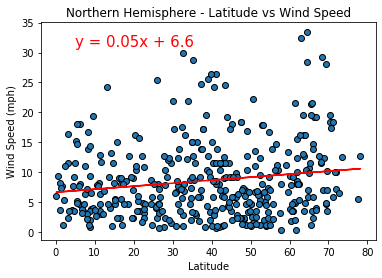

In [26]:
# Calculate the r value
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere["Wind Speed"]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {abs(round(correlation[0],2))}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5,31),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/NorthernHemisphere_WindSpeed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15


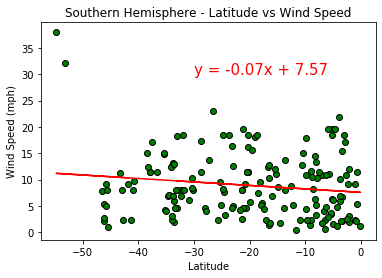

In [34]:
# Calculate the r value
y_value = "Wind Speed"
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere[y_value]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {abs(round(correlation[0],2))}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (mph)")
plt.savefig(f"output_data/SouthernHemisphere_{y_value}")
plt.show()